In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
plt.style.use("fivethirtyeight")

In [30]:
brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

In [31]:
brands.head()

,product_id,brand
0,AH2430,NaN
1,G27341,Adidas
2,CM0081,Adidas
3,B44832,Adidas
4,D98205,Adidas


In [32]:
finance.head()

,product_id,listing_price,sale_price,discount,revenue
0,AH2430,NaN,NaN,NaN,NaN
1,G27341,75.99,37.99,0.5,1641.17
2,CM0081,9.99,5.99,0.4,398.93
3,B44832,69.99,34.99,0.5,2204.37
4,D98205,79.99,39.99,0.5,5182.70


In [33]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB


In [34]:
info.head()

,product_name,product_id,description
0,NaN,AH2430,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...


In [35]:
reviews.head()

,product_id,rating,reviews
0,AH2430,NaN,NaN
1,G27341,3.3,24.0
2,CM0081,2.6,37.0
3,B44832,4.1,35.0
4,D98205,3.5,72.0


In [36]:
df = pd.merge(left=finance, right=info, on='product_id', how='left')
df = pd.merge(left=df, right=reviews, on='product_id', how='left')
df = pd.merge(left=df, right=brands, on='product_id', how='left')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
 5   product_name   3120 non-null   object 
 6   description    3117 non-null   object 
 7   rating         3120 non-null   float64
 8   reviews        3120 non-null   float64
 9   brand          3120 non-null   object 
dtypes: float64(6), object(4)
memory usage: 248.5+ KB


In [38]:
df = df.dropna()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 1 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3117 non-null   object 
 1   listing_price  3117 non-null   float64
 2   sale_price     3117 non-null   float64
 3   discount       3117 non-null   float64
 4   revenue        3117 non-null   float64
 5   product_name   3117 non-null   object 
 6   description    3117 non-null   object 
 7   rating         3117 non-null   float64
 8   reviews        3117 non-null   float64
 9   brand          3117 non-null   object 
dtypes: float64(6), object(4)
memory usage: 267.9+ KB


## What is the volume of products and mean revenue for Adidas and Nike products based on listing price quartiles?

### Label products priced up to quartile one as "Budget", quartile two as "Average", quartile three as "Expensive", and quartile four as "Elite"

In [40]:
labels = ['Budget', 'Average', 'Expensive', 'Elite']

In [41]:
df['price_label'] = pd.qcut(df['listing_price'], 4, labels)

In [42]:
df.head()

,product_id,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews,brand,price_label
1,G27341,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0,Adidas,Expensive
2,CM0081,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0,Adidas,Budget
3,B44832,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0,Adidas,Expensive
4,D98205,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0,Adidas,Expensive
5,B75586,47.99,19.20,0.6,1555.20,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,1.0,45.0,Adidas,Average


### Store as a pandas DataFrame called adidas_vs_nike containing the following columns: "brand", "price_label", "num_products", and "mean_revenue". All numeric values should be rounded to two decimal places.

In [47]:
adidas_vs_nike = df.groupby(['brand', 'price_label'], as_index=False).agg({'product_id':'count', 'revenue':'mean'}).round(2)
adidas_vs_nike = adidas_vs_nike.rename(columns={'product_id':'num_products', 'revenue':'mean_revenue'})
adidas_vs_nike

,brand,price_label,num_products,mean_revenue
0,Adidas,Budget,574,2015.68
1,Adidas,Average,655,3035.30
2,Adidas,Expensive,759,4621.56
3,Adidas,Elite,587,8302.78
4,Nike,Budget,357,1596.33
5,Nike,Average,8,675.59
6,Nike,Expensive,47,500.56
7,Nike,Elite,130,1367.45


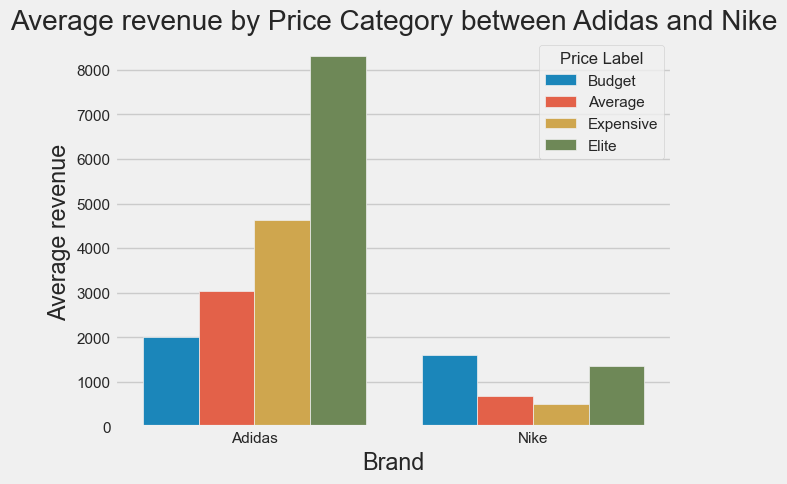

In [55]:
sns.barplot(data=adidas_vs_nike, x='brand', y='mean_revenue', hue='price_label')
plt.title('Average revenue by Price Category between Adidas and Nike')
plt.xlabel('Brand')
plt.ylabel('Average revenue')
plt.legend(title='Price Label')

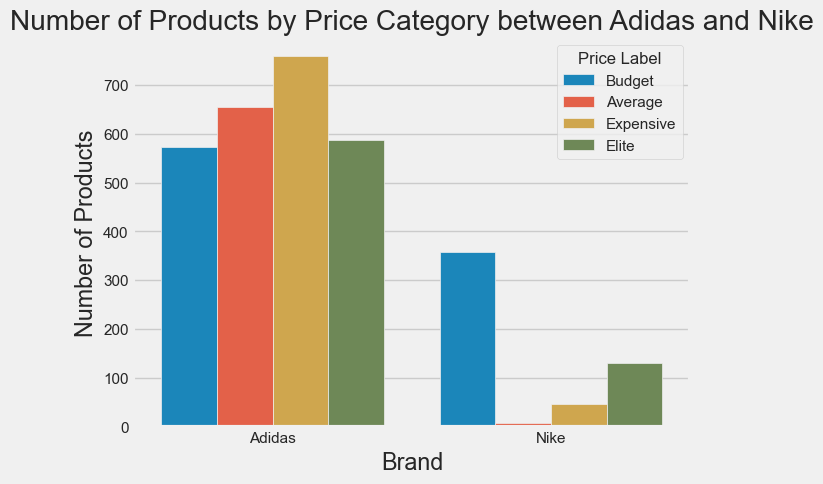

In [56]:
sns.barplot(data=adidas_vs_nike, x='brand', y='num_products', hue='price_label')
plt.title('Number of Products by Price Category between Adidas and Nike')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.legend(title='Price Label')

## Do any differences exist between the word count of a product's description and its mean rating?

### Split product description length into bins of 100 characters and calculate the average rating and number of reviews.
### Store the results as a pandas DataFrame called description_lengths containing the following columns: "description_length", "mean_rating", "num_reviews", again rounding numeric values to two decimal places.

In [57]:
df['description'].str.len()

1       175
2       172
3       264
4       288
5       221
       ... 
3174    146
3175    378
3176    204
3177    240
3178    202
Name: description, Length: 3117, dtype: int64

In [58]:
max(df['description'].str.len())

687

In [65]:
description_bins = [0, 100, 200, 300, 400, 500, 600, 700]
description_labels = ['100', '200', '300', '400', '500', '600', '700']

In [67]:
df['description_length'] = pd.cut(df['description'].str.len(), bins = description_bins, labels= description_labels)

In [68]:
df.head()

,product_id,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews,brand,price_label,description_length
1,G27341,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0,Adidas,Expensive,200
2,CM0081,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0,Adidas,Budget,200
3,B44832,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0,Adidas,Expensive,300
4,D98205,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0,Adidas,Expensive,300
5,B75586,47.99,19.20,0.6,1555.20,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,1.0,45.0,Adidas,Average,300


In [73]:
description_lengths = df.groupby('description_length', as_index=False).agg({'rating':'mean', 'reviews':'count'}).round(2)
description_lengths = description_lengths.rename(columns={'rating':'mean_rating', 'reviews':'reviews_count'})
description_lengths['description_length'] = description_lengths['description_length'].astype('int')
description_lengths

,description_length,mean_rating,reviews_count
0,100,2.26,7
1,200,3.19,526
2,300,3.28,1785
3,400,3.29,651
4,500,3.35,118
5,600,3.12,15
6,700,3.65,15


In [84]:
corr_coeff = np.corrcoef(description_lengths['description_length'], description_lengths['mean_rating'])[0][1].round(2)
corr_coeff

0.73

Text(0, 0.5, 'Average Rating')

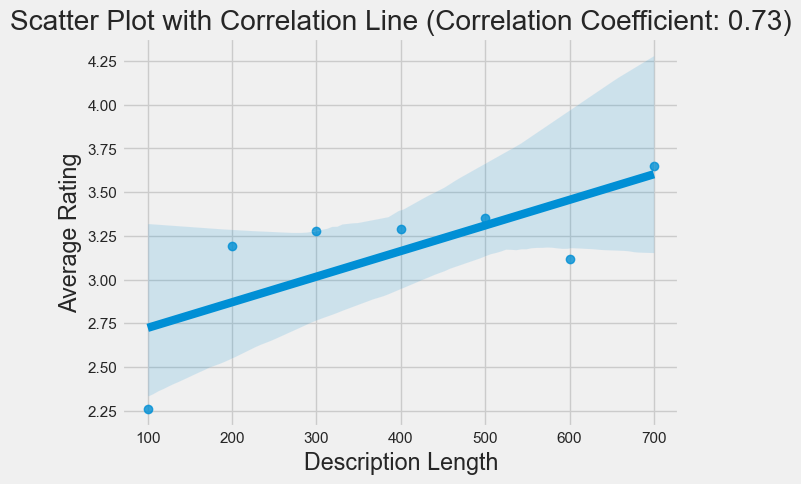

In [89]:
sns.regplot(data=description_lengths, y='mean_rating', x='description_length')
plt.title(f'Scatter Plot with Correlation Line (Correlation Coefficient: {corr_coeff})')
plt.xlabel('Description Length')
plt.ylabel('Average Rating')

## How does the volume of products and median revenue vary between clothing and footwear?

In [92]:
footwear_keywords ='shoe*|trainer*|foot*'

df_footwear = df[df['description'].str.contains(footwear_keywords)]
df_clothes = df[~df['description'].str.contains(footwear_keywords)]

In [94]:
df_clothes['description'].isnull().sum()

0

In [95]:
df_footwear.head()

,product_id,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews,brand,price_label,description_length
1,G27341,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0,Adidas,Expensive,200
2,CM0081,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0,Adidas,Budget,200
3,B44832,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0,Adidas,Expensive,300
4,D98205,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0,Adidas,Expensive,300
5,B75586,47.99,19.20,0.6,1555.20,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,1.0,45.0,Adidas,Average,300


In [115]:
df_foot_clothes = pd.concat([pd.DataFrame(data={
    'volume': [df_footwear['product_id'].count()],
    'median': [df_footwear['revenue'].median()]}, index=['footwear']),
          pd.DataFrame(data={
    'volume': [df_clothes['product_id'].count()],
    'median': [df_clothes['revenue'].median()]}, index=['clothes'])], axis=0).reset_index().rename(columns={'index':'category', 'volume':'num_products', 'median':'median_revenue'})
df_foot_clothes

,category,num_products,median_revenue
0,footwear,2639,3073.30
1,clothes,478,625.07


Text(0, 0.5, 'Median Revenue')

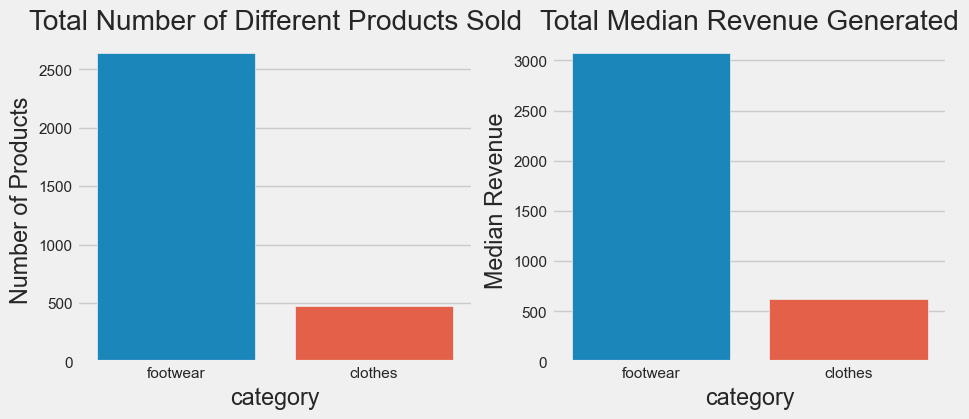

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(x='category', y='num_products', data=df_foot_clothes, ax=axes[0])
axes[0].set_title('Total Number of Different Products Sold')
axes[0].set_ylabel('Number of Products')
                   
sns.barplot(x='category', y='median_revenue', data=df_foot_clothes, ax=axes[1])
axes[1].set_title('Total Median Revenue Generated')
axes[1].set_ylabel('Median Revenue')                   